In [1]:
# Imports
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
sys.path.insert(1, r'C:\Users\soube\OneDrive\Desktop\Hammudi\Bachelorarbeit\Repository\AP-rent-determination\tree_models\tree_model_functions.py')
import tree_model_functions

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
# Selecting the DataSource
dataSource = r"C:\Users\soube\OneDrive\Desktop\Hammudi\Bachelorarbeit\Repository\AP-rent-determination\immonet_data\cleaned_data_without_NaN.csv"

# Selecting columns to drop out of featureList and creating LabelList
featureDropList = ["_id", "observationDate", "state", "city", "AP_community", "base_rent"]
LabelList = ["base_rent"]

# Create DataFrame from DataSource
dataframe = pd.read_csv(dataSource)

# Create list of unique states
states = dataframe["state"].unique()

# Create list for model scores
state_prediction_score = []

# Create list for most important features
feature_importances = []

In [25]:
# Loop throug all states to train them seperately
for state in states:
    df = dataframe
    df = df[df["state"]  == state]

    # Create feature and label lists
    y = df[LabelList]
    X = df.drop(featureDropList, axis = 1)
    feature_list = list(X.columns)

    y = np.array(y)
    X = np.array(X)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

    # Instantiate model
    xgb = XGBRegressor(n_estimators = 10, random_state=0)

    # Train the model on training data
    xgb.fit(X_train, y_train)

    # Use the Regressors's predict method on the test data
    predictions = xgb.predict(X_test)

    # Calculate the absolute errors
    errors = abs(predictions - y_test)

    # Print out the mean absolute error (mae)
    #print('Average model error:', round(np.mean(errors), 2), 'euros.')
    
    # Calculate relative prediction errors
    errors = [100 * (abs(predictions[i] - y_test[i])/ y_test[i]) for i in range(min(len(predictions), len(y_test)))]

    # Count of predictions that are at least 10% accurate
    count_good_predictions = sum(1 for i in errors if i <= 10)

    # Proportion of good predictions for the Testset
    good_predictions = round(np.mean(100 * (count_good_predictions / len(errors))), 2)
    #print('Percentage of predictions with less than 10 % deviation: ', good_predictions, '%.')

    state_prediction_score.append([state, good_predictions])

    # Get numerical feature importances
    importances = list(xgb.feature_importances_)

    # List of tuples with variable and importance
    feature_importances_state = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
    feature_importances = feature_importances + feature_importances_state

KeyboardInterrupt: 

In [24]:
print(state_prediction_score)

[['Schleswig-Holstein', 73.03], ['Bremen', 60.11], ['Hessen', 62.51], ['Hamburg', 75.72], ['Nordrhein-Westfalen', 56.7], ['Baden-Württemberg', 54.47], ['Bayern', 60.14], ['Thüringen', 58.96], ['Mecklenburg-Vorpommern', 56.64], ['Sachsen', 67.52], ['Brandenburg', 57.88], ['Berlin', 71.18], ['Saarland', 54.01], ['Sachsen-Anhalt', 59.72], ['Niedersachsen', 63.53], ['Rheinland-Pfalz', 55.21], ['Schleswig-Holstein', 76.32], ['Bremen', 63.48], ['Hessen', 67.19], ['Hamburg', 76.92], ['Nordrhein-Westfalen', 64.33], ['Baden-Württemberg', 60.64], ['Bayern', 65.75], ['Thüringen', 66.94], ['Mecklenburg-Vorpommern', 69.91], ['Sachsen', 71.89], ['Brandenburg', 65.75], ['Berlin', 76.42], ['Saarland', 60.58], ['Sachsen-Anhalt', 71.74], ['Niedersachsen', 69.62], ['Rheinland-Pfalz', 60.74], ['Schleswig-Holstein', 73.03], ['Bremen', 60.11], ['Hessen', 62.51], ['Hamburg', 75.72], ['Nordrhein-Westfalen', 56.7], ['Baden-Württemberg', 54.47], ['Bayern', 60.14], ['Thüringen', 58.96], ['Mecklenburg-Vorpommern'

In [6]:
# Convert state_prediction_score list into DataFrame
state_prediction_df = pd.DataFrame(state_prediction_score, columns = ["state", "score"])
# Calculate the average score of the model
prediction_score = state_prediction_df["score"].mean()
print("Model score :", prediction_score, "%")

Model score : 61.708125 %


### Get rid of unnnecessary Variables ###

In [7]:
feature_importances_df = pd.DataFrame(feature_importances, columns = ["Variable", "Importance"])
# Get the mean Importances for every Variable
mean_importances = feature_importances_df.groupby("Variable")["Importance"].mean()
mean_importances.shape

(62,)

In [8]:
feature_importances_df = pd.DataFrame(feature_importances, columns = ["Variable", "Importance"])
feature_importances_df["average_Importance"] = feature_importances_df["Importance"].groupby(feature_importances_df["Variable"]).transform("mean")
# Get the mean Importances for every Variable
mean_importances = feature_importances_df.groupby("Variable")["Importance"].mean()


cols = ["Variable", "average_Importance"]
mean_importances_list = feature_importances_df[cols].values.tolist()

new_mean_importances_list = []
for i in mean_importances_list:
    if i not in new_mean_importances_list:
        new_mean_importances_list.append(i)
new_mean_importances_list = sorted(new_mean_importances_list, key = lambda x : x[1], reverse = True)

In [9]:
[print(new_mean_importances_list)]

[['livingSpace', 0.1706250011920929], ['deposit', 0.13374999165534973], ['averageRent_APC', 0.10000000149011612], ['constructionYear', 0.04312499985098839], ['lift', 0.030625000596046448], ['distance_airport', 0.02812500111758709], ['floorHeating', 0.02812499925494194], ['builtInKitchen', 0.021250000223517418], ['distance_children', 0.018124999478459358], ['distance_clinic', 0.016874998807907104], ['heatingType', 0.016249999403953552], ['furnished', 0.015625], ['distance_beergarden', 0.015625], ['rentPerParking', 0.014999999664723873], ['floorType', 0.014999999664723873], ['distance_university', 0.014999999664723873], ['longitude', 0.013749999925494194], ['distance_harbour', 0.013749999925494194], ['distance_tram_station', 0.013124999590218067], ['condition', 0.01249999925494194], ['latitude', 0.01249999925494194], ['distance_nightclub', 0.011874999850988388], ['distance_shelter', 0.011249999515712261], ['energyConsumption', 0.010625000111758709], ['distance_charging_station', 0.010625

[None]

Text(0.5, 1.0, 'Variable Importances')

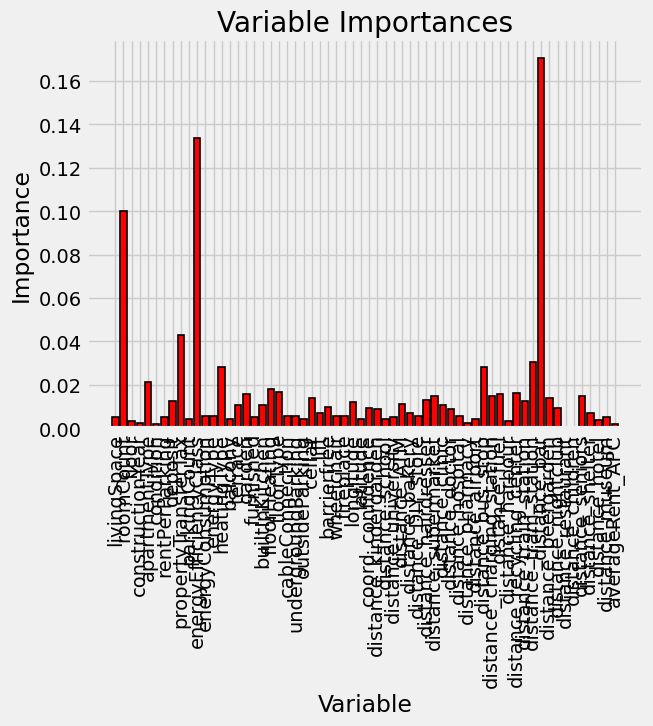

In [10]:
# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(mean_importances)))

# Make a bar chart
plt.bar(x_values, mean_importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')

Text(0.5, 1.0, 'Cumulative Importances')

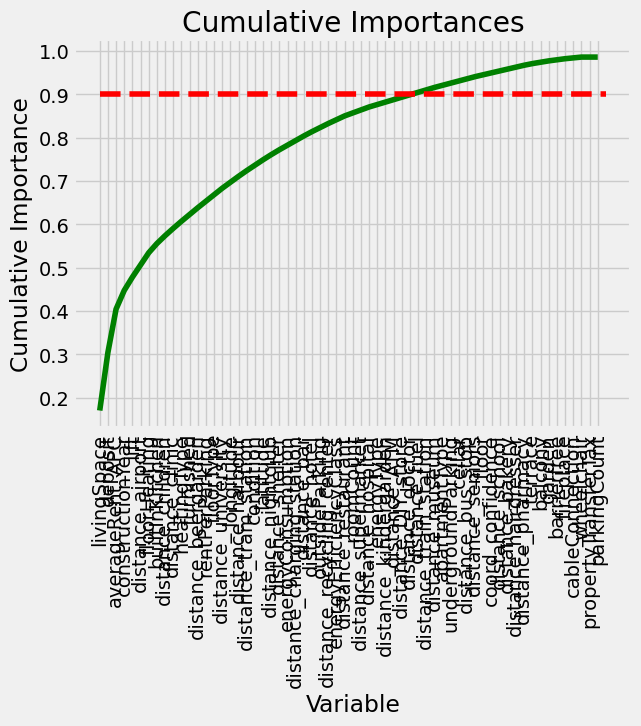

In [11]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in new_mean_importances_list]
sorted_features = [importance[0] for importance in new_mean_importances_list]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances')

In [12]:
# Find number of features for cumulative importance of 90%
# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 40


In [13]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:np.where(cumulative_importances > 0.90)[0][0] + 1]]
# Find the columns of the most important features
important_indices = [feature_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_X_train = X_train[:, important_indices]
important_X_test = X_test[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_X_train.shape)
print('Important test features shape:', important_X_test.shape)

Important train features shape: (1304, 40)
Important test features shape: (326, 40)


In [14]:
# Train the expanded model on only the important features
xgb.fit(important_X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [15]:
# Make predictions on test data
predictions = xgb.predict(important_X_test)

In [16]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Average model error:', round(np.mean(errors), 2), 'euros.')
                    
# Calculate relative prediction errors
errors = [100 * (abs(predictions[i] - y_test[i])/ y_test[i]) for i in range(min(len(predictions), len(y_test)))]

# Count of predictions that are at least 10% accurate
count_good_predictions = sum(1 for i in errors if i <= 10)

# Proportion of good predictions for the Testset
good_predictions = round(np.mean(100 * (count_good_predictions / len(errors))), 2)
print('Percentage of predictions with less than 10 % deviation: ', good_predictions, '%.')

Average model error: 275.35 euros.
Percentage of predictions with less than 10 % deviation:  55.21 %.


### Hyperparameter Tuning ###

In [17]:
# Selecting the DataSource
dataSource = r"C:\Users\soube\OneDrive\Desktop\Hammudi\Bachelorarbeit\Repository\AP-rent-determination\immonet_data\cleaned_data_without_NaN.csv"

# Selecting columns to drop out of featureList and creating LabelList
LabelList = ["base_rent"]

# Create DataFrame from DataSource
dataframe = pd.read_csv(dataSource)

# Create list for best random search params
best_random_search_params_list =  []

# Create list for best grid search params
best_grid_search_params_list =  []

In [18]:
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = [100 * (abs(predictions[i] - y_test[i])/ y_test[i]) for i in range(min(len(predictions), len(y_test)))]
    count_good_predictions = sum(1 for i in errors if i <= 10)
    good_predictions = round(np.mean(100 * (count_good_predictions / len(errors))), 2)
    return good_predictions
    print('Percentage of predictions with less than 10 % deviation: ', good_predictions, '%.')

In [19]:
# Loop throug all states to train them seperately
for state in states:
    df = dataframe
    df = df[df["state"]  == state]

    # Create feature and label lists
    y = df[LabelList]
    X = df[important_feature_names]
    feature_list = list(X.columns)

    y = np.array(y)
    X = np.array(X)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

    # Instantiate model
    xgb = XGBRegressor(n_estimators = 10, random_state=0)


    # Create the random grid
    XGB_param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    xgb = XGBRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 10 different combinations, and use all available cores
    xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = XGB_param_grid,
                                n_iter = 100, scoring = 'neg_mean_absolute_error', 
                                cv = 3, verbose = 2, random_state = 0, n_jobs=-1)

    # Fit the random search model
    xgb_random.fit(X_train, y_train)

    print("Best Params: ", xgb_random.best_params_)

    # Evaluate the default model
    base_model = XGBRegressor(n_estimators = 100, random_state = 0)
    base_model.fit(X_train, y_train)
    print("Base Model Performance for state: ", state)
    predictions = base_model.predict(X_test)
    errors = [100 * (abs(predictions[i] - y_test[i])/ y_test[i]) for i in range(min(len(predictions), len(y_test)))]
    count_good_predictions = sum(1 for i in errors if i <= 10)
    good_predictions = round(np.mean(100 * (count_good_predictions / len(errors))), 2)
    print('Percentage of predictions with less than 10 % deviation: ', good_predictions, '%.')

    # Evaluate the Best Random Search Model
    best_random = xgb_random.best_estimator_
    print("Best Random Search Model Performance for state: ", state)
    predictions = best_random.predict(X_test)
    errors = [100 * (abs(predictions[i] - y_test[i])/ y_test[i]) for i in range(min(len(predictions), len(y_test)))]
    count_good_predictions = sum(1 for i in errors if i <= 10)
    good_predictions = round(np.mean(100 * (count_good_predictions / len(errors))), 2)
    print('Percentage of predictions with less than 10 % deviation: ', good_predictions, '%.')

    best_random_search_params_list = best_random_search_params_list + [state, best_random, good_predictions]

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Params:  {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 5, 'gamma': 0.5, 'colsample_bytree': 0.8}
Base Model Performance for state:  Schleswig-Holstein
Percentage of predictions with less than 10 % deviation:  78.95 %.
Best Random Search Model Performance for state:  Schleswig-Holstein
Percentage of predictions with less than 10 % deviation:  75.66 %.
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Params:  {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 4, 'gamma': 0.5, 'colsample_bytree': 0.6}
Base Model Performance for state:  Bremen
Percentage of predictions with less than 10 % deviation:  64.04 %.
Best Random Search Model Performance for state:  Bremen
Percentage of predictions with less than 10 % deviation:  56.18 %.
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Params:  {'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 5, 'gamma': 5, 'colsample_bytree

In [20]:
best_random_search_params_list

['Schleswig-Holstein',
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
              reg_lambda=1, ...),
 75.66,
 'Bremen',
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.5, gp